### 1. What scale of measurement applies to timeseries data? Is timeseries data continuous or discrete? Why?

Time series data is continuous: while we have finite number of equidistant (on the time axis) datapoints, time itself is continuous without a discreet basic unit. The scale of measurement of time itself in a time series data is interval (setting 0 is arbitrary)

### 2.	What does ARIMA stand for? Break down and explain each piece in the name

AR: Autoregression, that is it predicts future values based on one or more periods past values. An AR(1) uses 1 lag observation.

I: Integrated, that it observes the difference between previous and current data values. The difference is used in order to achieve stationary data.

MA: Moving average that describes the dependency of the regressive error based on the moving average of regressive errors related to previous observations.



### 3.	Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale: one that is more common than Kelvin.

In [1]:
import pandas as pd

temp = pd.read_csv('temperatures/temperature.csv', parse_dates = True, index_col = 'datetime')
#temp.set_index(pd.DatetimeIndex(temp['datetime']), inplace = True)

#temp = temp.drop(['datetime'], axis = 1)

In [2]:
def convert_temp(dataframe):
    new_dict = {}
    new_frame = pd.DataFrame(new_dict)
    
    for column in dataframe.columns:
        new_frame[column] = dataframe[column] - 273.15
    
    return new_frame

# or we could make this simpler using some built-in features:

def convert(df):
    new = df.apply(lambda x: x-273.15)
    
    return new
        

In [3]:
convert(temp)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.950000,NaN,NaN,NaN
2012-10-01 13:00:00,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,11.460000,...,12.480000,15.070000,12.680000,14.020000,34.440000,32.320000,37.430000,31.25,31.25,30.35
2012-10-01 14:00:00,11.479041,8.933252,16.324993,8.647217,18.718186,18.383501,20.253141,23.458509,12.004558,11.457306,...,12.513208,15.097676,12.684650,14.036092,34.440000,31.160000,37.345769,31.25,31.25,30.35
2012-10-01 15:00:00,11.476998,8.941867,16.310618,8.639833,18.712845,18.393355,20.242177,23.481487,12.083952,11.449918,...,12.606824,15.176940,12.697789,14.081672,34.241513,31.131841,37.261539,31.25,31.25,30.35
2012-10-01 16:00:00,11.474955,8.950481,16.296243,8.632449,18.707503,18.403209,20.231213,23.504466,12.163345,11.442530,...,12.700441,15.256203,12.710929,14.127251,33.995200,31.088015,37.177308,31.25,31.25,30.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,8.850000,NaN,7.670000,20.400000,19.000000,16.390000,21.560000,12.570000,16.410000,...,17.090000,NaN,1.980000,14.930000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,9.740000,NaN,8.500000,22.530000,19.590000,17.460000,22.440000,13.300000,17.550000,...,16.090000,NaN,0.980000,12.870000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,10.240000,NaN,9.600000,22.810000,19.430000,18.190000,23.100000,13.290000,16.560000,...,13.630000,NaN,0.330000,10.790000,NaN,NaN,NaN,NaN,NaN,NaN


### 4.	Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through 

In [5]:
def fill_in(df):
    new = df.interpolate(method ='linear', limit_direction ='backward', limit = 1)
    return new

In [6]:
filled = fill_in(temp)
filled

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,309.100000,304.4,304.4,303.5
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868185,291.533501,293.403141,296.608509,285.154558,284.607305,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847789,287.231672,307.391513,304.281841,310.411539,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,289.560000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,290.700000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,289.710000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN


### 5.	Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.

In [7]:
import numpy as np

resampled = temp.groupby(by=[temp.index.month]).mean() #groupby and calculate means by months only
winter_months = [0, 1, 11] # select the appropriate months
summer_months = [5, 6, 7]

# calculate average for the months selected and put them into dataframe
winter_average = resampled.iloc[winter_months].mean().to_frame().rename(columns = {0 : 'Winter'}) 
summer_average = resampled.iloc[summer_months].mean().to_frame().rename(columns = {0 : 'Summer'})

# create a dictionary that links the index of the rows to the cities represented by those indeces
city_dict = {}
for i in range(len(winter_average)):
    city_dict[i] = winter_average.index[i]

#calculate the difference between all possible pairs of cities and assign True and False values based on our initial criteria.
#Creates an antisimmetric matrix which we convert to dataframe
winter_substract = pd.DataFrame((winter_average['Winter'].values[:, None] - winter_average['Winter'].values) < 0 )  
summer_substract = pd.DataFrame((summer_average['Summer'].values[:, None] - summer_average['Summer'].values) > 0 )

# We want to select those fields which are True in both dataframes. I will do this by comparing them.
# Because False==False gives True, we have to make sure False values are represented differently in the two dataframes
winter_substract.replace({False : 0}, inplace = True)
summer_substract.replace({False : 2}, inplace = True)

# Compare the two dataframes
compared = (winter_substract == summer_substract)

# Use np.where to extract the indeces and column numbers of the True fields. 
#The indeces correspond to the indeces of the A cities, while the column numbers are the indeces of the B cities
A_df = pd.DataFrame(np.where(compared == True)[0]).rename(columns = {0:'A'})
B_df = pd.DataFrame(np.where(compared == True)[1]).rename(columns = {0:'B'})

# Merge the two into a dataframe and replace the numbers by city names
AB  = A_df.merge(B_df, right_index = True, left_index = True)
AB.replace(city_dict, inplace = True)

AB

,A,B
0,Portland,San Francisco
1,Portland,Seattle
2,Las Vegas,San Francisco
3,Las Vegas,Los Angeles
4,Las Vegas,San Diego
...,...,...
163,Tel Aviv District,Nahariyya
164,Eilat,Jacksonville
165,Eilat,Miami
166,Eilat,Haifa


### 6.	For two of the cities you found in question 5 (there are many possible answers), clean up the data via rolling averages and plot a clear visual. Explain how rolling average differs from moving average (MA) model.

The rolling average is the actual mean of the (in this case previous) n = window observations assigned to the timepoint. In the MA model part of arima, MA is not the moving average of previous n terms, but a weighted average of previous n residual errors.

In [89]:
import matplotlib.pyplot as plt

# here I will define a function that plots both smoothed temperature data on the same graph as well as on separate graphs

def plot_both(pairs, index, df, w = 1000, fsize = 12): # pairs is the dataframe containing the city pairs, index is the index of the row we chose
    cityA, cityB = pairs.iloc[index, :]
    
    rollingA = df[cityA].rolling(window = w).mean().dropna()
    rollingB = df[cityB].rolling(window = w).mean().dropna()

    fig = plt.figure(figsize = (14, 14)) # create figure
    
    ax0 = fig.add_subplot(3, 1, 1) # create 3 subplots in a column
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3, sharex = ax2)
    
    fig.tight_layout(pad = 7.0) # set the spacing between plots
    
    ax0.plot(rollingA, c = 'r')
    ax0.set_xlabel('Date', fontsize = fsize)
    ax0.set_ylabel(f'Temperature (K) in {cityA}',  color = 'r', fontsize = fsize)
    ax0.set_title(f'Seasonal temperature variations in {cityA} and {cityB}')
    ax0.tick_params('y', colors = 'r')

    ax1 = ax0.twinx() # share axes with ax2 and plot on the same space (y axes labels will be different)
    ax1.plot(rollingB, c = '#1f77b4')
    ax1.set_ylabel(f'Temperature (K) in {cityB}',  color = '#1f77b4', fontsize = fsize)
    ax1.tick_params('y', colors = '#1f77b4')
    
    ax2.plot(rollingA, c = 'r')
    ax2.set_xlabel('Date', fontsize = fsize)
    ax2.set_ylabel(f'Temperature (K) in {cityA}',  color = 'r', fontsize = fsize)
    ax2.set_title(f'Seasonal temperature variations in {cityA}')
    ax0.tick_params('y', colors = 'r')
    
    ax3.plot(rollingB, c = '#1f77b4')
    ax3.set_xlabel('Date', fontsize = fsize)
    ax3.set_ylabel(f'Temperature (K) in {cityB}',  color = '#1f77b4', fontsize = fsize)
    ax3.set_title(f'Seasonal temperature variations in {cityB}')
    ax0.tick_params('y', colors = 'r')
    
    plt.show()
    

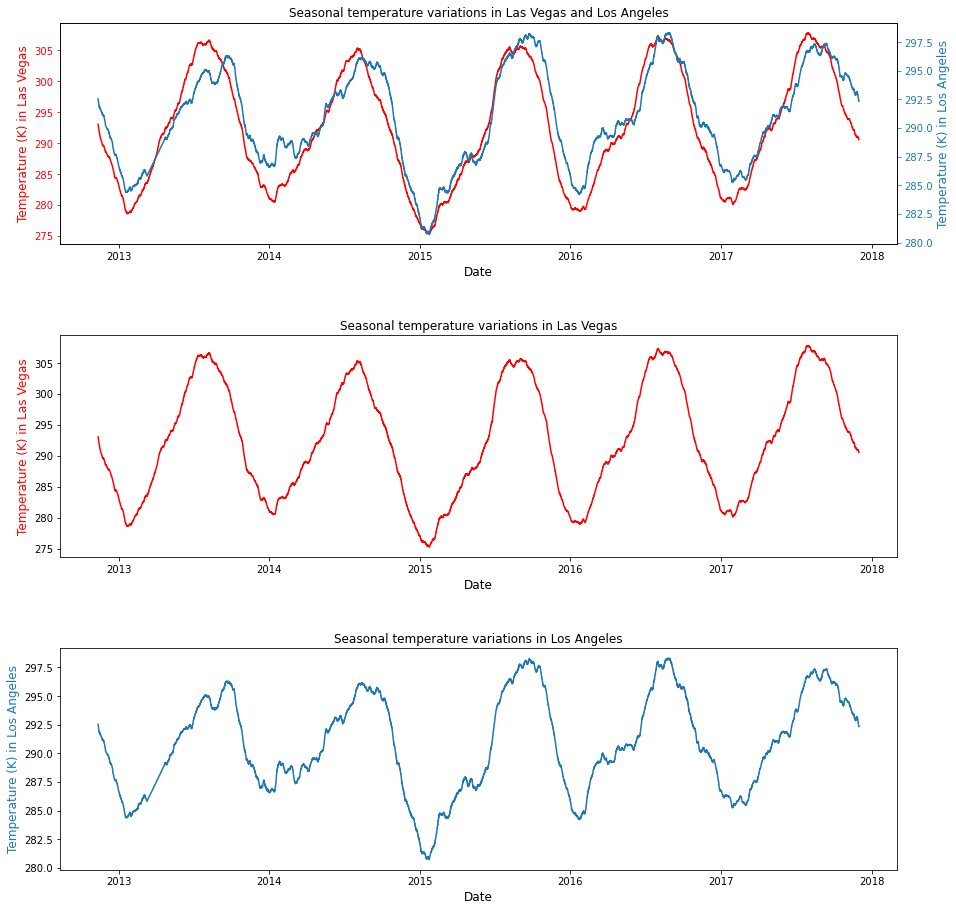

In [90]:
plot_both(AB, 3, temp, w = 1000)

### 7.	Perform SARIMA on five cities, iterating through the cities programmatically. Explain your results.

In the first part I explore one city manually, while in the second part I define a function that finds best SARIMA and gives the result summary and prediction.

In [46]:
import warnings
import itertools
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
from pylab import rcParams

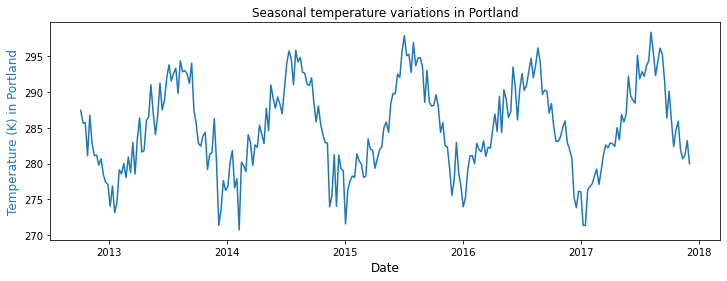

In [88]:
portland = filled['Portland'].dropna()
portland_w = dropped.resample('W').mean()

plt.figure(figsize=(12,4))
plt.plot(portland_w, c = '#1f77b4')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Temperature (K) in Portland',  color = '#1f77b4', fontsize = 12)
plt.title('Seasonal temperature variations in Portland')

plt.show()

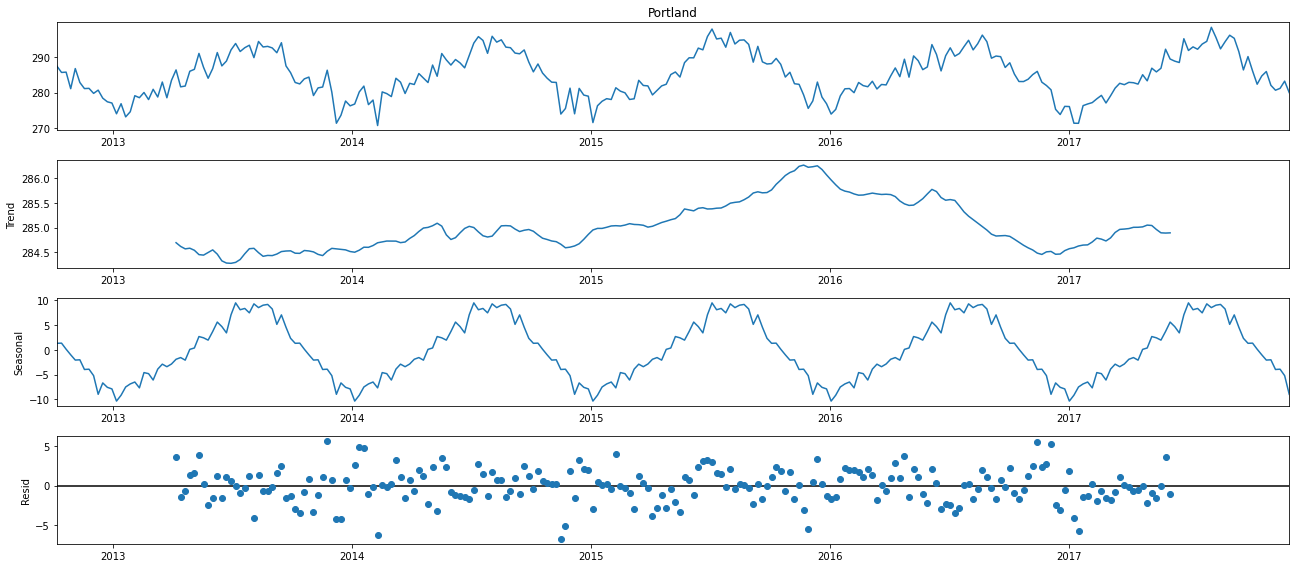

In [64]:
# already clear from the raw data that there is seasonality, we can check for the trend, too: 

rcParams['figure.figsize'] = 18, 8
decomposition  = sm.tsa.seasonal_decompose(portland_w, model = 'additive')
fig = decomposition.plot()

plt.show()

The trend and easonality needs to be removed, although in this case there is no clear trend as 2017 returned to average

In [79]:
# an other option is to run ADFuller to test stationarity

def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(np.round(np.asarray(dftest[0:4]), 2), index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    print('Results of Dickey-Fuller Test:')
    
    for key, value in dftest[4].items():
        dfoutput[f'Critical value {key}'] = value
    print(dfoutput)
        

In [80]:
adf_test(portland_w)

Results of Dickey-Fuller Test:
Test Statistic                  -6.290000
p-value                          0.000000
#Lags Used                      13.000000
Number of Observations Used    256.000000
Critical value 1%               -3.456155
Critical value 5%               -2.872897
Critical value 10%              -2.572822
dtype: float64


The p-value is 0 so we would need to reject the null hypothesis. The original data on this timescale does not seem stationary at all, so I will still take the differential moving forward. 

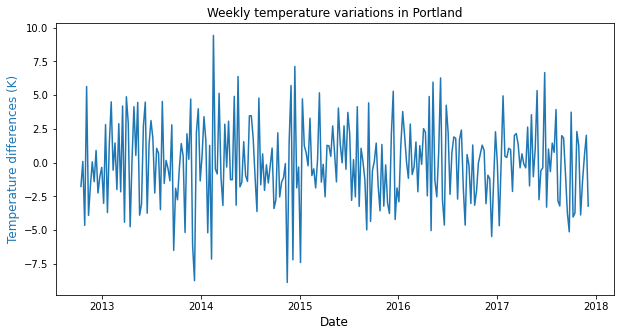

In [87]:
# we can make the timeseries stationary:

data_trend_adj = portland_w.diff().dropna()

plt.figure(figsize=(10,5))
plt.plot(data_trend_adj, c = '#1f77b4')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Temperature differences (K)',  color = '#1f77b4', fontsize = 12)
plt.title('Weekly temperature variations in Portland')

plt.show()

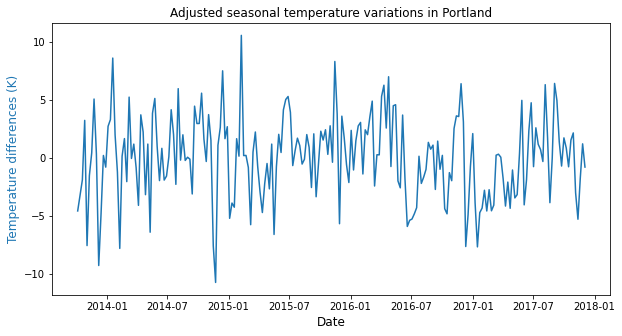

In [94]:
# adjusting for seasonality

data_season_adj = portland_w.diff(52).dropna()

plt.figure(figsize=(10,5))
plt.plot(data_season_adj)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Temperature differences (K)',  color = '#1f77b4', fontsize = 12)
plt.title('Adjusted seasonal temperature variations in Portland')

plt.show()

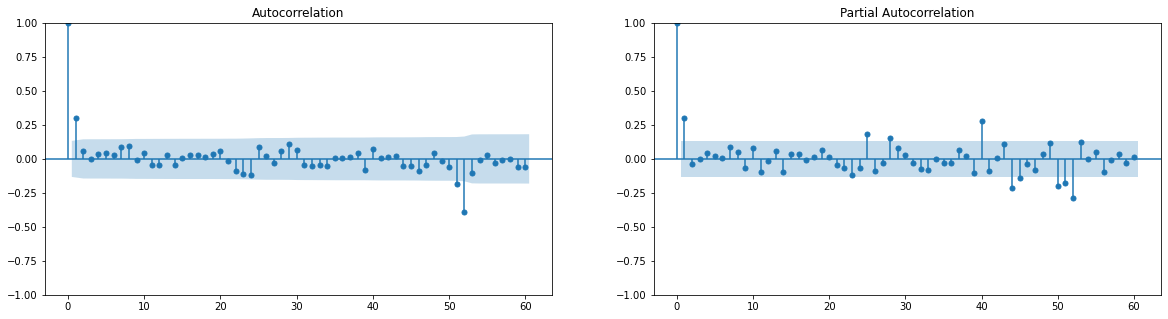

In [95]:
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1,2,figsize=(20,5))
plot_acf(data_season_adj, lags = 60, ax=ax[0])
plot_pacf(data_season_adj, lags = 60, ax=ax[1])
plt.show()


In [96]:
# from ACF we can see initial spike at lag1 and seasonal spike at lag 52 (as assumed earlier)
# this makes an AR(1) and seasonal AR(1) likely (p = 1)

# we differentiated once (d = 1)

# from PACF we can see see initial spike at lag1 and seasonal spike at lag 52 (as assumed earlier)
# this makes an MA(1) or MA(2) and seasonal MA(1) likely (q  = 1 or 2)

# we can test for the parameters creating a grid:

def find_parameters(data):
    p = range(1, 2)
    d = range(1, 2)
    q = range(1, 3)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

    SARIMAS = {}
    AIC = []

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(data, order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                AIC.append(results.aic)
                SARIMAS[results.aic] = [param, param_seasonal]
            except:
                continue

    print(f'The best SARIMA for weekly data is ARIMA{SARIMAS[min(AIC)][0]}x{SARIMAS[min(AIC)][1]}52, with AIC:{min(AIC)}')
    mod = sm.tsa.statespace.SARIMAX(data, order = SARIMAS[min(AIC)][0], seasonal_order = SARIMAS[min(AIC)][1], enforce_stationarity=False, enforce_invertibility=False)
    results = mod.fit()
    
    return results



In [97]:
find_parameters(portland_w)


The best SARIMA for weekly data is ARIMA(1, 1, 2)x(1, 1, 2, 52)52, with AIC:542.8317242348636


We can print the results:

In [99]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Portland   No. Observations:                  270
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 52)   Log Likelihood                -264.416
Date:                            Thu, 09 Dec 2021   AIC                            542.832
Time:                                    10:36:43   BIC                            561.735
Sample:                                10-07-2012   HQIC                           550.499
                                     - 12-03-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1383      0.408     -0.339      0.735      -0.938       0.661
ma.L1         -0.6850      0.354   

We can also predict and plot together with the real data:

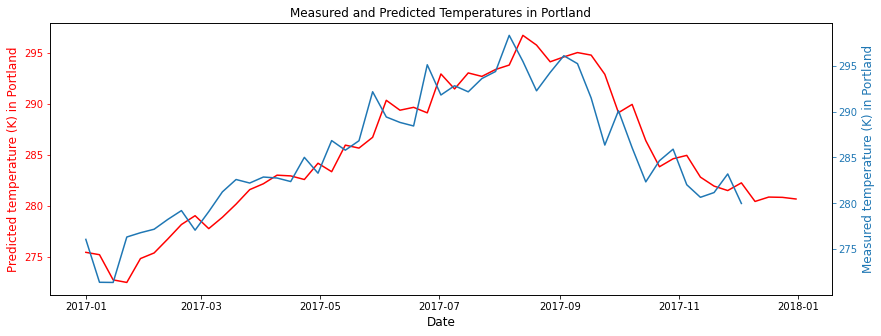

In [118]:
predicted = results.predict(start='2017-01-01', end='2017-12-30')
to_plot = portland_w.iloc[-49:] # chose the existing portland data for the same time period

fig = plt.figure(figsize = (14, 5)) # create figure
    
ax0 = fig.add_subplot(1, 1, 1) 
    
ax0.plot(predicted, c = 'r')
ax0.set_xlabel('Date', fontsize = 12)
ax0.set_ylabel('Predicted temperature (K) in Portland',  color = 'r', fontsize = 12)
ax0.set_title('Measured and Predicted Temperatures in Portland')
ax0.tick_params('y', colors = 'r')

ax1 = ax0.twinx() # share axes with ax1 and plot on the same space (y axes labels will be different)
ax1.plot(to_plot, c = '#1f77b4')
ax1.set_ylabel('Measured temperature (K) in Portland',  color = '#1f77b4', fontsize = 12)
ax1.tick_params('y', colors = '#1f77b4')

plt.show()

#### We could also look for the best model using auto_arime

In [106]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(portland_w, start_p=0, start_q=0, max_p=7, max_q=7, d=1, max_d=7,
 trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1362.263, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1342.038, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1335.852, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1360.285, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1337.827, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1337.809, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1330.705, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1324.928, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1337.370, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1326.838, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1326.800, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1325.109, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1338.300, Time=0.13 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1328.788, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0]          

In [108]:
print(step_wise.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  270
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -656.484
Date:                Thu, 09 Dec 2021   AIC                           1322.969
Time:                        10:49:28   BIC                           1340.942
Sample:                             0   HQIC                          1330.187
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1827      0.117     10.143      0.000       0.954       1.411
ar.L2         -0.3109      0.119     -2.612      0.009      -0.544      -0.078
ma.L1         -1.5708      0.085    -18.421      0.0

This is a very different model from what I found manually. The p values for this SARIMAX model are much better than mine but the AIC is much worse. It is possible that this is overfitted. LEt's see how the prediction from this fits:

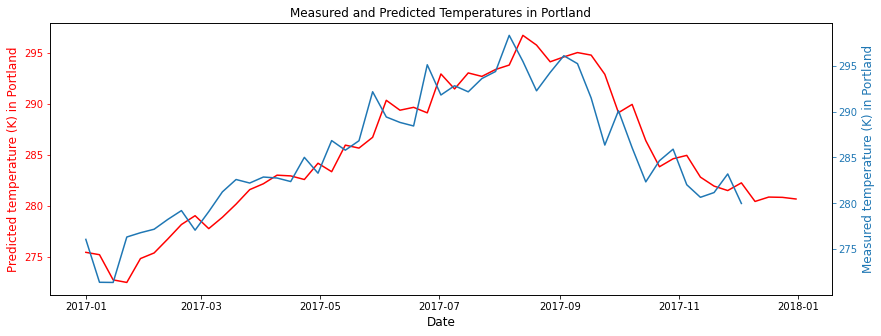

In [125]:
mod = sm.tsa.statespace.SARIMAX(portland_w, order = (2, 1, 2), seasonal_order = (0, 0, 0, 0), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()

predicted = results.predict(start='2017-01-01', end='2017-12-30')
to_plot = portland_w['2017-01-01':] # chose the existing portland data for the same time period

fig = plt.figure(figsize = (14, 5)) # create figure
    
ax0 = fig.add_subplot(1, 1, 1) 
    
ax0.plot(predicted, c = 'r')
ax0.set_xlabel('Date', fontsize = 12)
ax0.set_ylabel('Predicted temperature (K) in Portland',  color = 'r', fontsize = 12)
ax0.set_title('Measured and Predicted Temperatures in Portland')
ax0.tick_params('y', colors = 'r')

ax1 = ax0.twinx() # share axes with ax1 and plot on the same space (y axes labels will be different)
ax1.plot(to_plot, c = '#1f77b4')
ax1.set_ylabel('Measured temperature (K) in Portland',  color = '#1f77b4', fontsize = 12)
ax1.tick_params('y', colors = '#1f77b4')

plt.show()

This is interesting: it does not really look better than my own SARIMAX model.

#### In this part I put this all into one function and evaluate models for several cities

In [129]:
def find_print_plot(data, city):
    
    city_data = data.dropna()[city]
    city_data_w = city_data.resample('W').mean()
    
    p = range(1, 2) # I keep these ranges as the parameters are likely to fall within and also this computer is not vey fast
    d = range(1, 2)
    q = range(1, 3)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))] # looking to weekly, so 52 stays

    SARIMAS = {}
    AIC = []

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(city_data_w, order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                AIC.append(results.aic)
                SARIMAS[results.aic] = [param, param_seasonal]
            except:
                continue
    
    print(f'The best SARIMA for weekly data of {city} is ARIMA{SARIMAS[min(AIC)][0]}x{SARIMAS[min(AIC)][1]}52, with AIC:{min(AIC)}')
    mod = sm.tsa.statespace.SARIMAX(city_data_w, order = SARIMAS[min(AIC)][0], seasonal_order = SARIMAS[min(AIC)][1], enforce_stationarity=False, enforce_invertibility=False)
    results = mod.fit()
    
    print(results.summary())

    predicted = results.predict(start='2017-01-01', end='2017-12-30')
    to_plot = city_data_w['2017-01-01':] # chose the existing portland data for the same time period

    fig = plt.figure(figsize = (14, 5)) # create figure
    
    ax0 = fig.add_subplot(1, 1, 1)
    
    ax0.plot(predicted, c = 'r')
    ax0.set_xlabel('Date', fontsize = 12)
    ax0.set_ylabel(f'Predicted temperature (K) in {city}',  color = 'r', fontsize = 12)
    ax0.set_title(f'Measured and Predicted Temperatures in {city}')
    ax0.tick_params('y', colors = 'r')

    ax1 = ax0.twinx() # share axes with ax1 and plot on the same space (y axes labels will be different)
    ax1.plot(to_plot, c = '#1f77b4')
    ax1.set_ylabel(f'Measured temperature (K) in {city}',  color = '#1f77b4', fontsize = 12)
    ax1.tick_params('y', colors = '#1f77b4')
    
    plt.show()


Now we can go through a list of cities and produce results:

The best SARIMA for weekly data of Seattle is ARIMA(1, 1, 2)x(1, 1, 2, 52)52, with AIC:496.9290353811522
                                     SARIMAX Results                                      
Dep. Variable:                            Seattle   No. Observations:                  265
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 52)   Log Likelihood                -241.465
Date:                            Thu, 09 Dec 2021   AIC                            496.929
Time:                                    11:42:09   BIC                            515.507
Sample:                                10-07-2012   HQIC                           504.457
                                     - 10-29-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1    

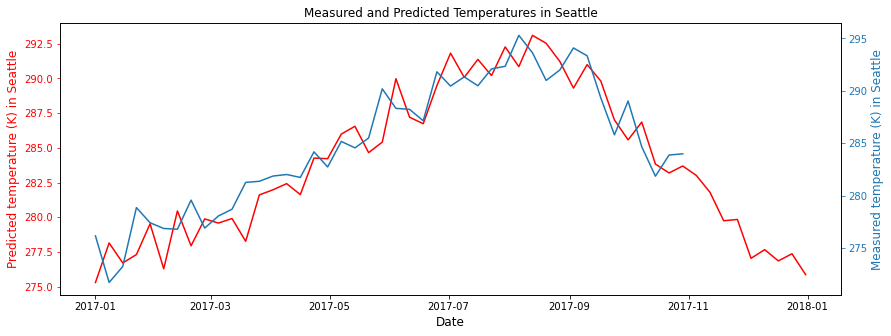

The best SARIMA for weekly data of Eilat is ARIMA(1, 1, 2)x(1, 1, 2, 52)52, with AIC:470.0136431782313
                                     SARIMAX Results                                      
Dep. Variable:                              Eilat   No. Observations:                  265
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 52)   Log Likelihood                -228.007
Date:                            Thu, 09 Dec 2021   AIC                            470.014
Time:                                    11:43:30   BIC                            488.591
Sample:                                10-07-2012   HQIC                           477.542
                                     - 10-29-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      

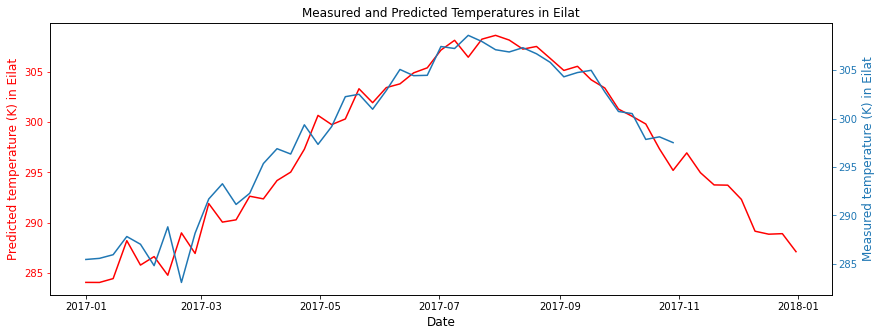

The best SARIMA for weekly data of Denver is ARIMA(1, 1, 2)x(1, 1, 2, 52)52, with AIC:559.9696817666631
                                     SARIMAX Results                                      
Dep. Variable:                             Denver   No. Observations:                  265
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 52)   Log Likelihood                -272.985
Date:                            Thu, 09 Dec 2021   AIC                            559.970
Time:                                    11:45:04   BIC                            578.547
Sample:                                10-07-2012   HQIC                           567.498
                                     - 10-29-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1     

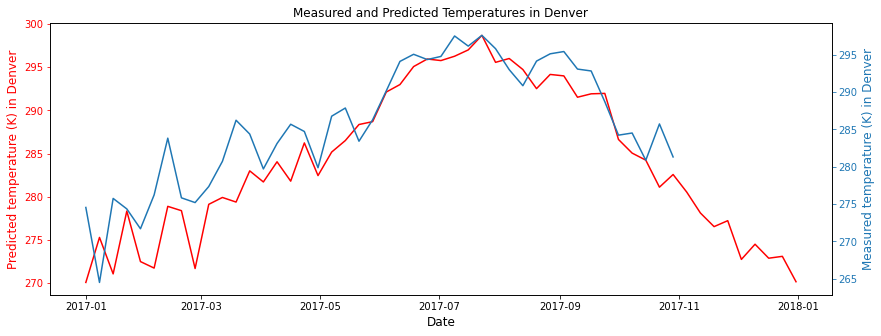

The best SARIMA for weekly data of Miami is ARIMA(1, 1, 2)x(1, 1, 2, 52)52, with AIC:370.6911960349075
                                     SARIMAX Results                                      
Dep. Variable:                              Miami   No. Observations:                  265
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 52)   Log Likelihood                -178.346
Date:                            Thu, 09 Dec 2021   AIC                            370.691
Time:                                    11:47:18   BIC                            389.269
Sample:                                10-07-2012   HQIC                           378.219
                                     - 10-29-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      

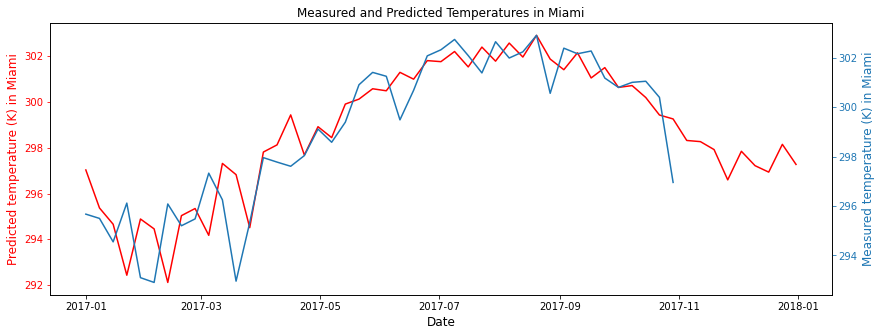

The best SARIMA for weekly data of Haifa is ARIMA(1, 1, 2)x(1, 1, 2, 52)52, with AIC:475.5013942907962
                                     SARIMAX Results                                      
Dep. Variable:                              Haifa   No. Observations:                  265
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 52)   Log Likelihood                -230.751
Date:                            Thu, 09 Dec 2021   AIC                            475.501
Time:                                    11:49:01   BIC                            494.079
Sample:                                10-07-2012   HQIC                           483.029
                                     - 10-29-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      

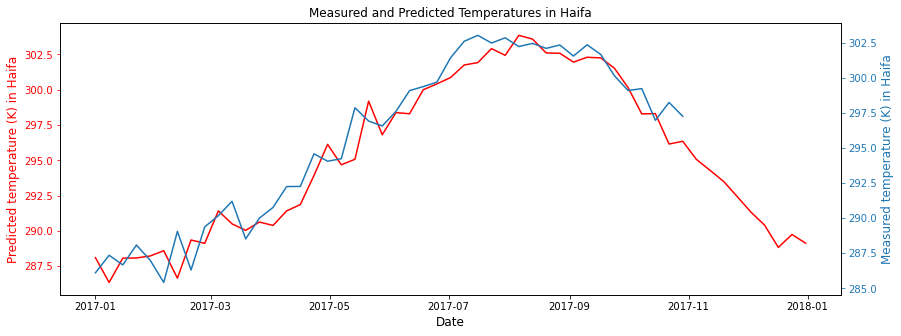

In [130]:
cities = ['Seattle', 'Eilat', 'Denver', 'Miami', 'Haifa']

for city in cities:
    find_print_plot(filled, city)

### 8.	Explain what you see when you perform results.summary() on the cities in question 7

The function choose ARIMA(1, 1, 2)x(1, 1, 2, 52)52 for all of these datasets based on the minimal AIC. The p values for the different parameters show great variation. Visually the best p values for the parameters do not correspond to the closest fit.

### 9. What do GARCH and ARCH Stand for? Break down and explain each piece in the names. Explain the difference between the two. Create a GARCH and ARCH model on the same 5 cities from question 6. Explain and graph the results.

ARCH: A(uto)R(egressive)C(onditional)H(eteroskedasticity)

Autoregressive: Current values depend on past values and we are using these past values (of residual errors) to estimate current values

Conditional: Conditional in that it depends on the (not constant) variance

Heteroskedasticity: the variance is not constant (constant variance case would be Homoskedasticity)

GARCH: G(eneralized)ARCH
Generalized: besides using lag residuals as above, we are using lag variances as well



In [158]:
from arch import arch_model

def arch_garch(data, city):
    
    city_data = data.dropna()[city]
    city_data_w = city_data.resample('W').mean()
#our ARCH model (p = 1 as wa saw from SARIMAX)

    print(f'Results of ARCH model for {city}')
    am = arch_model(city_data_w, p = 1, mean = 'Constant', vol = 'ARCH') 
    res = am.fit(update_freq=5)
    print(res.summary())

# our GARCH model:
    print(f'Results of GARCH model for {city}')
    gam = arch_model(city_data_w, p = 1, q = 2) # p and q are coming from our previous SARIMAX estimations
    gres = gam.fit(update_freq=5)
    print(gres.summary())

In [159]:
for city in cities:
    arch_garch(filled, city)
    

Results of ARCH model for Seattle
Iteration:      5,   Func. Count:     23,   Neg. LLF: 801.1646390887372
Optimization terminated successfully    (Exit mode 0)
            Current function value: 801.163915997058
            Iterations: 8
            Function evaluations: 34
            Gradient evaluations: 8
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Seattle   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -801.164
Distribution:                  Normal   AIC:                           1608.33
Method:            Maximum Likelihood   BIC:                           1619.07
                                        No. Observations:                  265
Date:                Thu, Dec 09 2021   Df Residuals:                      264
Time:                        14:32:28   Df Model:       

Iteration:      5,   Func. Count:     35,   Neg. LLF: 811.5473111991976
Iteration:     10,   Func. Count:     70,   Neg. LLF: 712.9911960435335
Iteration:     15,   Func. Count:    104,   Neg. LLF: 627.5290312454258
Optimization terminated successfully    (Exit mode 0)
            Current function value: 627.4703206879024
            Iterations: 19
            Function evaluations: 129
            Gradient evaluations: 19
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Miami   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -627.470
Distribution:                  Normal   AIC:                           1264.94
Method:            Maximum Likelihood   BIC:                           1282.84
                                        No. Observations:                  265
Date:                

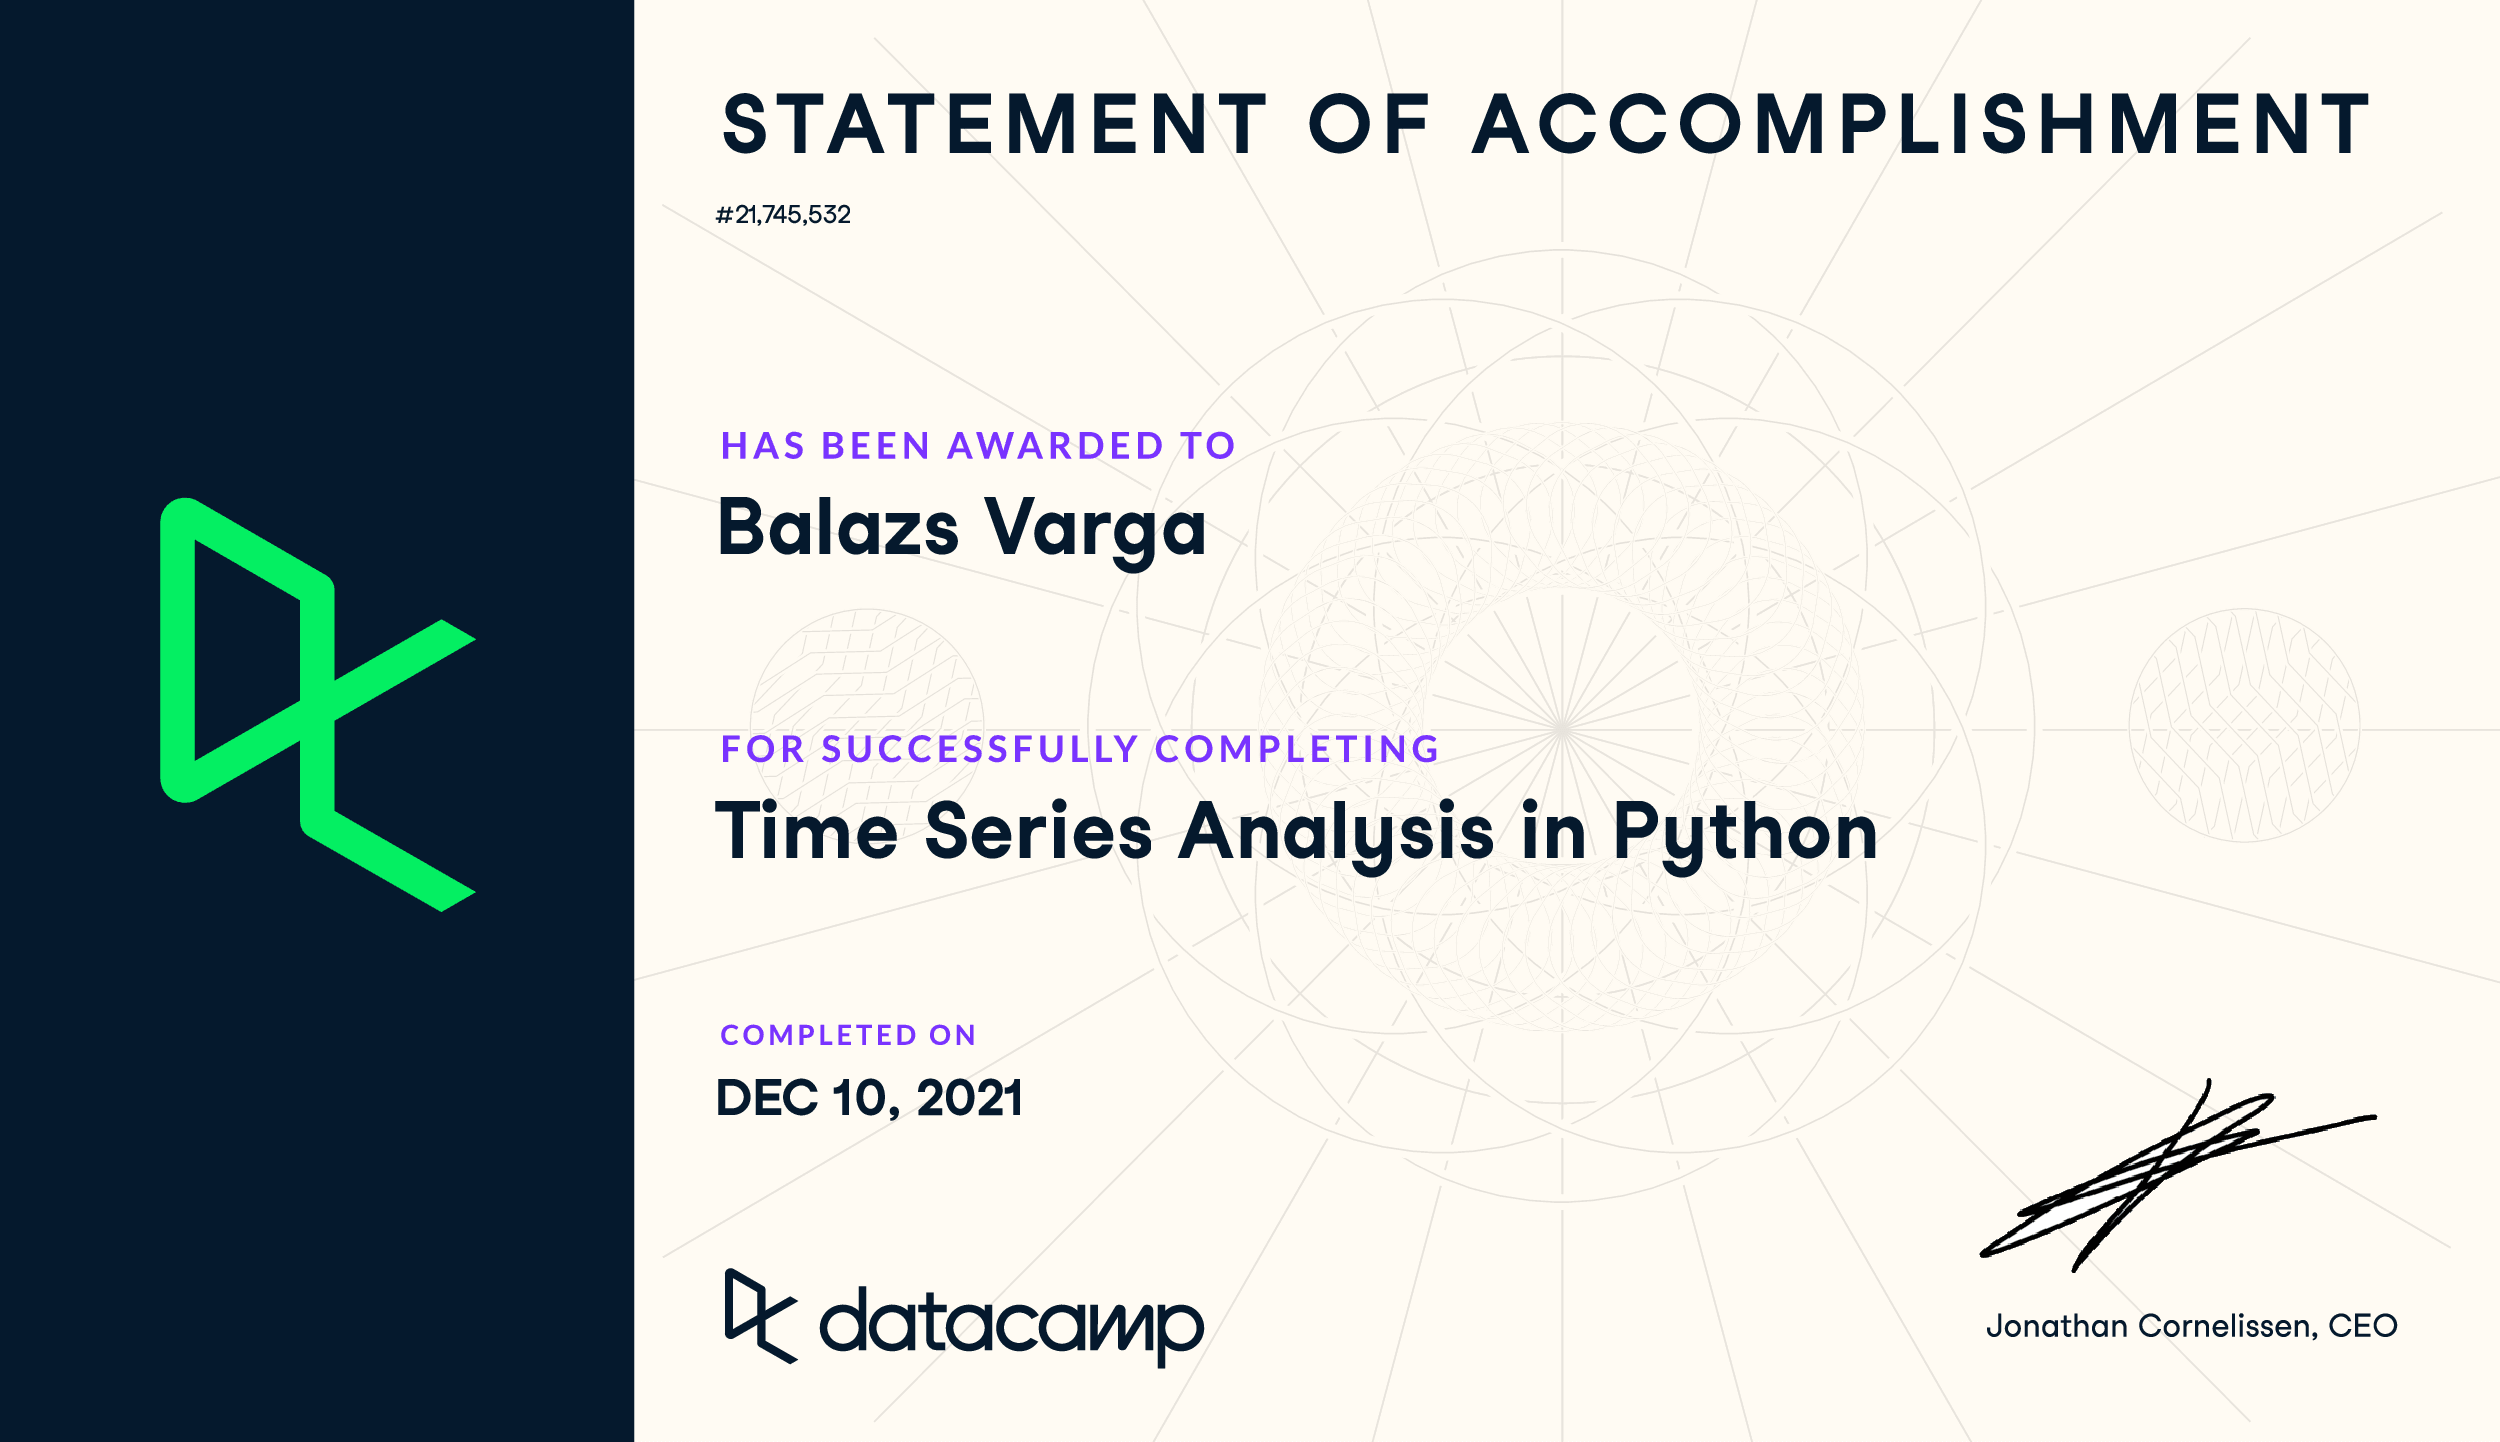